In [1]:
import pandas as pd
from pandas import json_normalize
import requests 
from bs4 import BeautifulSoup
import re
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
def get_country_artist(name):
    if isinstance(name, str):
        corr_name = name.lower().replace(" ", "-")
        url = f"https://www.famousbirthdays.com/people/{corr_name}.html"
        res = requests.get(url)
        soup = BeautifulSoup(res.content, "html.parser")
        birthplace = soup.find("div", {"class":"bio-module__info"})  
    else:
        return np.nan
    try:
        return birthplace.find_all("a")[5].getText().strip()
    except:
        return np.nan
# Defines a function that looks for a specific webpage of an artist, and if it founds it, returns the birthplace of the artist. If not, it returns a "nan" value.    

In [3]:
spotify_singers_corrected = pd.read_csv("C:/Users/marti/OneDrive/Escritorio/ironhack/projects/Pipelines/spotify-2023_solved.csv")
spotify_singers_corrected
# Imports the "spotify_singers_corrected.csv" file.

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45.0,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58.0,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91.0,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125.0,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87.0,15,425.0,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37.0,1,0.0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8.0,0,0.0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7.0,0,0.0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17.0,0,0.0,97,C#,Major,82,67,77,8,0,12,5


In [4]:
spotify_singers_corrected["artist_country"] = spotify_singers_corrected["artist(s)_name"].apply(get_country_artist) 

# Adds a column to the dataframe which includes the country of birthplace of the artist. 

In [5]:
spotify_singers_corrected
# Prints the modified dataframe.

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_country
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45.0,10,826.0,125,B,Major,80,89,83,31,0,8,4,NaN
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58.0,14,382.0,92,C#,Major,71,61,74,7,0,10,4,PR
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91.0,14,949.0,138,F,Major,51,32,53,17,0,31,6,CA
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125.0,12,548.0,170,A,Major,55,58,72,11,0,11,15,PA
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87.0,15,425.0,144,A,Minor,65,23,80,14,63,11,6,29 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37.0,1,0.0,144,A,Major,60,24,39,57,0,8,3,TX
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8.0,0,0.0,166,F#,Major,42,7,24,83,1,12,6,PA
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7.0,0,0.0,92,C#,Major,80,81,67,4,0,8,6,NaN
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17.0,0,0.0,97,C#,Major,82,67,77,8,0,12,5,NaN


In [7]:
new_name = 'spotify_singers_updated'
spotify_singers_updated = spotify_singers_corrected.copy()  
spotify_singers_updated = spotify_singers_updated.rename_axis(new_name)

spotify_singers_updated
# Renames the updated dataframe.

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_country
spotify_singers_updated,,,,,,,,,,,,,,,,,,,,,,,,,
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45.0,10,826.0,125,B,Major,80,89,83,31,0,8,4,NaN
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58.0,14,382.0,92,C#,Major,71,61,74,7,0,10,4,PR
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91.0,14,949.0,138,F,Major,51,32,53,17,0,31,6,CA
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125.0,12,548.0,170,A,Major,55,58,72,11,0,11,15,PA
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87.0,15,425.0,144,A,Minor,65,23,80,14,63,11,6,29 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37.0,1,0.0,144,A,Major,60,24,39,57,0,8,3,TX
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8.0,0,0.0,166,F#,Major,42,7,24,83,1,12,6,PA
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7.0,0,0.0,92,C#,Major,80,81,67,4,0,8,6,NaN


In [8]:
country = spotify_singers_updated["artist_country"].unique()
country
#Prints the unique values of the column "artist_country".

array([nan, 'PR', 'CA', 'PA', '29 years old', 'Spain', 'GA', 'TN', 'IL',
       'England', 'MO', 'South Korea', '30 years old', 'South Africa',
       'Canada', 'Colombia', 'VA', '23 years old', 'NY', 'RI', 'TX',
       'Argentina', 'Australia', 'Scotland', 'France', 'NC',
       '25 years old', 'Mexico', '40 years old', '24 years old', 'HI',
       '34 years old', 'Ireland', 'MA', '39 years old', '20 years old',
       '32 years old', 'Japan', '43 years old', '33 years old',
       'Trinidad And Tobago', 'Pakistan', 'Brazil', 'FL', 'Barbados',
       '26 years old', 'IN', 'Sep 26', 'OH', 'Apr 14', 'AL', 'MS', 'NJ',
       '62 years old', 'Belgium', 'Sweden', 'Netherlands', 'WA', 'Chile',
       'Indonesia', 'KY', 'age 53', '31 years old', 'NM', '22 years old',
       '21 years old', 'Venezuela', 'Nigeria'], dtype=object)

In [9]:
state_dict = {
    'PR': 'Puerto Rico',
    'CA': 'USA',
    'PA': 'USA',
    'GA': 'USA',
    'TN': 'USA',
    'IL': 'USA',
    'MO': 'USA',
    'VA': 'USA',
    'NY': 'USA',
    'RI': 'USA',
    'TX': 'USA',
    'NC': 'USA',
    'HI': 'USA',
    'MA': 'USA',
    'FL': 'USA',
    'IN': 'USA',
    'OH': 'USA',
    'AL': 'USA',
    'MS': 'USA',
    'NJ': 'USA',
    'WA': 'USA',
    'KY': 'USA',
    'NM': 'USA'
}
# Creates a dict with the states of USA.

In [10]:
spotify_singers_updated["artist_country"] = spotify_singers_updated["artist_country"].replace(state_dict)
# Substitutes the keys of the dict with the values.

In [11]:
spotify_singers_updated
# Prints the updated dataframe.

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_country
spotify_singers_updated,,,,,,,,,,,,,,,,,,,,,,,,,
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45.0,10,826.0,125,B,Major,80,89,83,31,0,8,4,NaN
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58.0,14,382.0,92,C#,Major,71,61,74,7,0,10,4,Puerto Rico
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91.0,14,949.0,138,F,Major,51,32,53,17,0,31,6,USA
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125.0,12,548.0,170,A,Major,55,58,72,11,0,11,15,USA
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87.0,15,425.0,144,A,Minor,65,23,80,14,63,11,6,29 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37.0,1,0.0,144,A,Major,60,24,39,57,0,8,3,USA
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8.0,0,0.0,166,F#,Major,42,7,24,83,1,12,6,USA
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7.0,0,0.0,92,C#,Major,80,81,67,4,0,8,6,NaN


In [12]:
url4 = "https://www.geodatos.net/poblacion/paises#google_vignette"
res = requests.get(url4)
soup = BeautifulSoup(res.content, "html.parser")
# Takes raw HTML input from "geodates" web and parses it so it can be used in Python.

In [13]:
def get_country (soup):
    geo_info = soup.find_all("td")   
    return [i.getText().strip() for i in geo_info]
# Finds all the info in a class related to attribute "f16 flex items-center".

In [14]:
geo_info = get_country(soup)

sublist_size = 6

# Create the "geo_list" and group items into sublists
geo_list = [geo_info[i:i + sublist_size] for i in range(0, len(geo_info), sublist_size)]

# Print the resulting "geo_list"
print(geo_list)

[['1', 'China', '1,439,323,774', '+0.46%', '+0.58%', '153'], ['2', 'India', '1,380,004,385', '+1.07%', '+1.53%', '464'], ['3', 'Estados Unidos', '331,002,647', '+0.63%', '+0.87%', '36.19'], ['4', 'Indonesia', '273,523,621', '+1.17%', '+1.47%', '151'], ['5', 'Pakistán', '220,892,331', '+2.15%', '+2.76%', '287'], ['6', 'Brasil', '212,559,409', '+0.79%', '+1.08%', '25.43'], ['7', 'Nigeria', '206,139,587', '+2.76%', '+3.43%', '226'], ['8', 'Bangladesh', '164,689,383', '+1.08%', '+1.45%', '1,265'], ['9', 'Rusia', '145,934,460', '+0.13%', '-0.02%', '8.91'], ['10', 'México', '128,932,753', '+1.16%', '+1.52%', '66.33'], ['11', 'Japón', '126,476,458', '-0.24%', '-0.04%', '347'], ['12', 'Etiopía', '114,963,583', '+2.8%', '+3.68%', '115'], ['13', 'Filipinas', '109,581,085', '+1.46%', '+2.03%', '368'], ['14', 'Egipto', '102,334,403', '+2.14%', '+2.43%', '103'], ['15', 'Vietnam', '97,338,583', '+1.01%', '+1.09%', '314'], ['16', 'Congo Democrático', '89,561,404', '+3.49%', '+4.51%', '39.51'], ['17',

In [15]:
geo_list_2 = [item for inner_list in geo_list for item in inner_list]
geo_list_2
# Extracts the text and deletes not needed spaces.

['1',
 'China',
 '1,439,323,774',
 '+0.46%',
 '+0.58%',
 '153',
 '2',
 'India',
 '1,380,004,385',
 '+1.07%',
 '+1.53%',
 '464',
 '3',
 'Estados Unidos',
 '331,002,647',
 '+0.63%',
 '+0.87%',
 '36.19',
 '4',
 'Indonesia',
 '273,523,621',
 '+1.17%',
 '+1.47%',
 '151',
 '5',
 'Pakistán',
 '220,892,331',
 '+2.15%',
 '+2.76%',
 '287',
 '6',
 'Brasil',
 '212,559,409',
 '+0.79%',
 '+1.08%',
 '25.43',
 '7',
 'Nigeria',
 '206,139,587',
 '+2.76%',
 '+3.43%',
 '226',
 '8',
 'Bangladesh',
 '164,689,383',
 '+1.08%',
 '+1.45%',
 '1,265',
 '9',
 'Rusia',
 '145,934,460',
 '+0.13%',
 '-0.02%',
 '8.91',
 '10',
 'México',
 '128,932,753',
 '+1.16%',
 '+1.52%',
 '66.33',
 '11',
 'Japón',
 '126,476,458',
 '-0.24%',
 '-0.04%',
 '347',
 '12',
 'Etiopía',
 '114,963,583',
 '+2.8%',
 '+3.68%',
 '115',
 '13',
 'Filipinas',
 '109,581,085',
 '+1.46%',
 '+2.03%',
 '368',
 '14',
 'Egipto',
 '102,334,403',
 '+2.14%',
 '+2.43%',
 '103',
 '15',
 'Vietnam',
 '97,338,583',
 '+1.01%',
 '+1.09%',
 '314',
 '16',
 'Congo Demo

In [16]:
list_of_dicts = []
def create_custom_dict(sublist, keys):
    return {keys[i]: sublist[i] for i in range(len(sublist))}
# Defines a function to create a dictionary with custom keys

In [17]:
key_names = ["index", "country", "population", "anual_variation_1", "anual_variation_2", "density"]
# Defines key names for each set of values.

In [18]:
for i in range(0, len(geo_list_2), 6):
    sublist = geo_list_2[i:i+6]
    custom_dict = create_custom_dict(sublist, key_names)
    list_of_dicts.append(custom_dict)   
# Loops to create dictionaries every 6 items.

print(list_of_dicts)
# Prints the list of dictionaries.

[{'index': '1', 'country': 'China', 'population': '1,439,323,774', 'anual_variation_1': '+0.46%', 'anual_variation_2': '+0.58%', 'density': '153'}, {'index': '2', 'country': 'India', 'population': '1,380,004,385', 'anual_variation_1': '+1.07%', 'anual_variation_2': '+1.53%', 'density': '464'}, {'index': '3', 'country': 'Estados Unidos', 'population': '331,002,647', 'anual_variation_1': '+0.63%', 'anual_variation_2': '+0.87%', 'density': '36.19'}, {'index': '4', 'country': 'Indonesia', 'population': '273,523,621', 'anual_variation_1': '+1.17%', 'anual_variation_2': '+1.47%', 'density': '151'}, {'index': '5', 'country': 'Pakistán', 'population': '220,892,331', 'anual_variation_1': '+2.15%', 'anual_variation_2': '+2.76%', 'density': '287'}, {'index': '6', 'country': 'Brasil', 'population': '212,559,409', 'anual_variation_1': '+0.79%', 'anual_variation_2': '+1.08%', 'density': '25.43'}, {'index': '7', 'country': 'Nigeria', 'population': '206,139,587', 'anual_variation_1': '+2.76%', 'anual_

In [19]:
import pandas as pd
df = pd.DataFrame(list_of_dicts)
df_1 = df.head(50)
df_1
# Creates a dataframe with the first 49 dictionaries.

,index,country,population,anual_variation_1,anual_variation_2,density
0,1,China,"1,439,323,774",+0.46%,+0.58%,153
1,2,India,"1,380,004,385",+1.07%,+1.53%,464
2,3,Estados Unidos,"331,002,647",+0.63%,+0.87%,36.19
3,4,Indonesia,"273,523,621",+1.17%,+1.47%,151
4,5,Pakistán,"220,892,331",+2.15%,+2.76%,287
5,6,Brasil,"212,559,409",+0.79%,+1.08%,25.43
6,7,Nigeria,"206,139,587",+2.76%,+3.43%,226
7,8,Bangladesh,"164,689,383",+1.08%,+1.45%,"1,265"
8,9,Rusia,"145,934,460",+0.13%,-0.02%,8.91
9,10,México,"128,932,753",+1.16%,+1.52%,66.33


In [20]:
list_of_dicts_2 = []

for i in range(0, len(geo_list_2), 6):
    sublist = geo_list_2[i+1:i+7]
    custom_dict = create_custom_dict(sublist, key_names)
    list_of_dicts_2.append(custom_dict)
# Loops to create dictionaries every 6 items.

print(list_of_dicts_2)
# Prints the list of dictionaries.

[{'index': 'China', 'country': '1,439,323,774', 'population': '+0.46%', 'anual_variation_1': '+0.58%', 'anual_variation_2': '153', 'density': '2'}, {'index': 'India', 'country': '1,380,004,385', 'population': '+1.07%', 'anual_variation_1': '+1.53%', 'anual_variation_2': '464', 'density': '3'}, {'index': 'Estados Unidos', 'country': '331,002,647', 'population': '+0.63%', 'anual_variation_1': '+0.87%', 'anual_variation_2': '36.19', 'density': '4'}, {'index': 'Indonesia', 'country': '273,523,621', 'population': '+1.17%', 'anual_variation_1': '+1.47%', 'anual_variation_2': '151', 'density': '5'}, {'index': 'Pakistán', 'country': '220,892,331', 'population': '+2.15%', 'anual_variation_1': '+2.76%', 'anual_variation_2': '287', 'density': '6'}, {'index': 'Brasil', 'country': '212,559,409', 'population': '+0.79%', 'anual_variation_1': '+1.08%', 'anual_variation_2': '25.43', 'density': '7'}, {'index': 'Nigeria', 'country': '206,139,587', 'population': '+2.76%', 'anual_variation_1': '+3.43%', 'a

In [21]:
import pandas as pd
df = pd.DataFrame(list_of_dicts_2)

df_2 = df.iloc[50:100]
df_2
# Creates a dataframe with the dictionaries in indexes between 50 and 98.

,index,country,population,anual_variation_1,anual_variation_2,density
50,51,Madagascar,"27,691,019",+2.85%,+3.78%,47.60
51,52,Camerún,"26,545,864",+2.79%,+3.56%,56.16
52,53,Costa de Marfil,"26,378,275",+2.71%,+3.02%,82.95
53,54,Corea del Norte,"25,778,815",+0.47%,+0.62%,214
54,55,Australia,"25,499,881",+1.31%,+1.71%,3.32
55,56,Níger,"24,206,636",+4.2%,+5.68%,19.11
56,57,Taiwán,"23,816,775",+0.22%,+0.42%,673
57,58,Sri Lanka,"21,413,250",+0.48%,+0.7%,341
58,59,Burkina Faso,"20,903,278",+3.08%,+4%,76.40
59,60,Mali,"20,250,834",+3.23%,+4.25%,16.60


In [22]:
list_of_dicts_3 = []

for i in range(0, len(geo_list_2), 6):
    sublist = geo_list_2[i+2:i+8]
    custom_dict = create_custom_dict(sublist, key_names)
    list_of_dicts_3.append(custom_dict)
# Loops to create dictionaries every 6 items.

print(list_of_dicts_3)
# Prints the list of dictionaries.

[{'index': '1,439,323,774', 'country': '+0.46%', 'population': '+0.58%', 'anual_variation_1': '153', 'anual_variation_2': '2', 'density': 'India'}, {'index': '1,380,004,385', 'country': '+1.07%', 'population': '+1.53%', 'anual_variation_1': '464', 'anual_variation_2': '3', 'density': 'Estados Unidos'}, {'index': '331,002,647', 'country': '+0.63%', 'population': '+0.87%', 'anual_variation_1': '36.19', 'anual_variation_2': '4', 'density': 'Indonesia'}, {'index': '273,523,621', 'country': '+1.17%', 'population': '+1.47%', 'anual_variation_1': '151', 'anual_variation_2': '5', 'density': 'Pakistán'}, {'index': '220,892,331', 'country': '+2.15%', 'population': '+2.76%', 'anual_variation_1': '287', 'anual_variation_2': '6', 'density': 'Brasil'}, {'index': '212,559,409', 'country': '+0.79%', 'population': '+1.08%', 'anual_variation_1': '25.43', 'anual_variation_2': '7', 'density': 'Nigeria'}, {'index': '206,139,587', 'country': '+2.76%', 'population': '+3.43%', 'anual_variation_1': '226', 'anu

In [23]:
import pandas as pd
df = pd.DataFrame(list_of_dicts_3)

df_3 = df.iloc[99:148]
df_3
# Creates a dataframe with the dictionaries in indexes between 99 and 147.

,index,country,population,anual_variation_1,anual_variation_2,density
99,100,Israel,"8,655,541",+1.7%,+2.28%,400
100,101,Suiza,"8,654,618",+0.86%,+1.06%,219
101,102,Togo,"8,278,737",+2.61%,+3.41%,152
102,103,Sierra Leona,"7,976,985",+2.25%,+3.7%,111
103,104,Hong Kong,"7,496,988",+0.87%,+0.67%,"7,140"
104,105,Laos,"7,275,556",+1.59%,+1.83%,31.52
105,106,Paraguay,"7,132,530",+1.33%,+1.7%,17.95
106,107,Bulgaria,"6,948,445",-0.7%,-0.66%,64.01
107,108,Libia,"6,871,287",+1.41%,+1.41%,3.91
108,109,Líbano,"6,825,442",+0.9%,+3.88%,667


In [24]:
list_of_dicts_4 = []

for i in range(0, len(geo_list_2), 6):
    sublist = geo_list_2[i+3:i+9]
    custom_dict = create_custom_dict(sublist, key_names)
    list_of_dicts_4.append(custom_dict)
# Loops to create dictionaries every 6 items.

print(list_of_dicts_4)
# Prints the list of dictionaries.

[{'index': '+0.46%', 'country': '+0.58%', 'population': '153', 'anual_variation_1': '2', 'anual_variation_2': 'India', 'density': '1,380,004,385'}, {'index': '+1.07%', 'country': '+1.53%', 'population': '464', 'anual_variation_1': '3', 'anual_variation_2': 'Estados Unidos', 'density': '331,002,647'}, {'index': '+0.63%', 'country': '+0.87%', 'population': '36.19', 'anual_variation_1': '4', 'anual_variation_2': 'Indonesia', 'density': '273,523,621'}, {'index': '+1.17%', 'country': '+1.47%', 'population': '151', 'anual_variation_1': '5', 'anual_variation_2': 'Pakistán', 'density': '220,892,331'}, {'index': '+2.15%', 'country': '+2.76%', 'population': '287', 'anual_variation_1': '6', 'anual_variation_2': 'Brasil', 'density': '212,559,409'}, {'index': '+0.79%', 'country': '+1.08%', 'population': '25.43', 'anual_variation_1': '7', 'anual_variation_2': 'Nigeria', 'density': '206,139,587'}, {'index': '+2.76%', 'country': '+3.43%', 'population': '226', 'anual_variation_1': '8', 'anual_variation

In [25]:
import pandas as pd
df = pd.DataFrame(list_of_dicts_4)

df_4 = df.iloc[148:197]
df_4
# Creates a dataframe with the dictionaries in indexes between 148 and 196.

,index,country,population,anual_variation_1,anual_variation_2,density
148,149,Eslovenia,"2,078,932",+0.07%,+0.23%,103
149,150,Guinea-Bissáu,"1,967,998",+2.66%,+3.19%,69.99
150,151,Letonia,"1,886,202",-1.12%,-1.04%,30.32
151,152,Kosovo,"1,845,300",0,0,169
152,153,Bahréin,"1,701,583",+4.81%,+7.8%,"2,239"
153,154,Guinea Ecuatorial,"1,402,985",+4.01%,+6.57%,50.02
154,155,Trinidad y Tobago,"1,399,491",+0.43%,+0.52%,273
155,156,Estonia,"1,326,539",+0.17%,-0.26%,31.29
156,157,Timor Oriental,"1,318,442",+2.04%,+2.45%,88.66
157,158,Mauricio,"1,271,767",+0.2%,+0.37%,626


In [26]:
list_of_dicts_5 = []

for i in range(0, len(geo_list_2), 6):
    sublist = geo_list_2[i+4:i+10]
    custom_dict = create_custom_dict(sublist, key_names)
    list_of_dicts_5.append(custom_dict)
# Loops to create dictionaries every 6 items.

print(list_of_dicts_5)
# Prints the list of dictionaries.

[{'index': '+0.58%', 'country': '153', 'population': '2', 'anual_variation_1': 'India', 'anual_variation_2': '1,380,004,385', 'density': '+1.07%'}, {'index': '+1.53%', 'country': '464', 'population': '3', 'anual_variation_1': 'Estados Unidos', 'anual_variation_2': '331,002,647', 'density': '+0.63%'}, {'index': '+0.87%', 'country': '36.19', 'population': '4', 'anual_variation_1': 'Indonesia', 'anual_variation_2': '273,523,621', 'density': '+1.17%'}, {'index': '+1.47%', 'country': '151', 'population': '5', 'anual_variation_1': 'Pakistán', 'anual_variation_2': '220,892,331', 'density': '+2.15%'}, {'index': '+2.76%', 'country': '287', 'population': '6', 'anual_variation_1': 'Brasil', 'anual_variation_2': '212,559,409', 'density': '+0.79%'}, {'index': '+1.08%', 'country': '25.43', 'population': '7', 'anual_variation_1': 'Nigeria', 'anual_variation_2': '206,139,587', 'density': '+2.76%'}, {'index': '+3.43%', 'country': '226', 'population': '8', 'anual_variation_1': 'Bangladesh', 'anual_varia

In [27]:
import pandas as pd
df = pd.DataFrame(list_of_dicts_5)

df_5 = df.iloc[197:245]
df_5
# Creates a dataframe with the dictionaries in indexes between 197 and 244.

,index,country,population,anual_variation_1,anual_variation_2,density
197,198,Aruba,"106,766",+0.47%,+0.87%,593
198,199,Tonga,"105,697",+0.98%,+0.39%,147
199,200,Islas Vírgenes de los Estados Unidos,"104,423",-0.1%,-0.2%,298
200,201,Seychelles,"98,340",+0.71%,+1.07%,214
201,202,Antigua y Barbuda,"97,928",+0.93%,+1.44%,223
202,203,Jersey,"90,812",0,0,783
203,204,Isle of Man,"85,032",+0.43%,+0.53%,149
204,205,Andorra,"77,265",-0.19%,+0.91%,164
205,206,Dominica,"71,991",+0.23%,+0.17%,95.99
206,207,Islas Caimán,"65,720",+1.3%,+2.77%,274


In [28]:
list_of_dicts_6 = []

for i in range(0, len(geo_list_2), 6):
    sublist = geo_list_2[i+4:i+10]
    custom_dict = create_custom_dict(sublist, key_names)
    list_of_dicts_6.append(custom_dict)
# Loops to create dictionaries every 6 items.

print(list_of_dicts_6)
# Prints the list of dictionaries.

[{'index': '+0.58%', 'country': '153', 'population': '2', 'anual_variation_1': 'India', 'anual_variation_2': '1,380,004,385', 'density': '+1.07%'}, {'index': '+1.53%', 'country': '464', 'population': '3', 'anual_variation_1': 'Estados Unidos', 'anual_variation_2': '331,002,647', 'density': '+0.63%'}, {'index': '+0.87%', 'country': '36.19', 'population': '4', 'anual_variation_1': 'Indonesia', 'anual_variation_2': '273,523,621', 'density': '+1.17%'}, {'index': '+1.47%', 'country': '151', 'population': '5', 'anual_variation_1': 'Pakistán', 'anual_variation_2': '220,892,331', 'density': '+2.15%'}, {'index': '+2.76%', 'country': '287', 'population': '6', 'anual_variation_1': 'Brasil', 'anual_variation_2': '212,559,409', 'density': '+0.79%'}, {'index': '+1.08%', 'country': '25.43', 'population': '7', 'anual_variation_1': 'Nigeria', 'anual_variation_2': '206,139,587', 'density': '+2.76%'}, {'index': '+3.43%', 'country': '226', 'population': '8', 'anual_variation_1': 'Bangladesh', 'anual_varia

In [29]:
import pandas as pd
df = pd.DataFrame(list_of_dicts_6)

df_6 = pd.DataFrame(df.iloc[245])
df_6 = df_6.transpose()
df_6
# Creates a dataframe with the dictionary in index 245.

,index,country,population,anual_variation_1,anual_variation_2,density
245,246,Islas Pitcairn,46,0,0,0.98


In [30]:
list_of_dicts_7 = []

for i in range(0, len(geo_list_2), 6):
    sublist = geo_list_2[i+5:i+11]
    custom_dict = create_custom_dict(sublist, key_names)
    list_of_dicts_7.append(custom_dict)
# Loops to create dictionaries every 6 items.

print(list_of_dicts_7)
# Prints the list of dictionaries.

[{'index': '153', 'country': '2', 'population': 'India', 'anual_variation_1': '1,380,004,385', 'anual_variation_2': '+1.07%', 'density': '+1.53%'}, {'index': '464', 'country': '3', 'population': 'Estados Unidos', 'anual_variation_1': '331,002,647', 'anual_variation_2': '+0.63%', 'density': '+0.87%'}, {'index': '36.19', 'country': '4', 'population': 'Indonesia', 'anual_variation_1': '273,523,621', 'anual_variation_2': '+1.17%', 'density': '+1.47%'}, {'index': '151', 'country': '5', 'population': 'Pakistán', 'anual_variation_1': '220,892,331', 'anual_variation_2': '+2.15%', 'density': '+2.76%'}, {'index': '287', 'country': '6', 'population': 'Brasil', 'anual_variation_1': '212,559,409', 'anual_variation_2': '+0.79%', 'density': '+1.08%'}, {'index': '25.43', 'country': '7', 'population': 'Nigeria', 'anual_variation_1': '206,139,587', 'anual_variation_2': '+2.76%', 'density': '+3.43%'}, {'index': '226', 'country': '8', 'population': 'Bangladesh', 'anual_variation_1': '164,689,383', 'anual_

In [31]:
import pandas as pd
df = pd.DataFrame(list_of_dicts_7)

df_7 = pd.DataFrame(df.iloc[246])
df_7 = df_7.transpose()
df_7
# Creates a dataframe with the dictionary in index 246.

,index,country,population,anual_variation_1,anual_variation_2,density
246,247,Islas Georgia del Sur y Sandwich del Sur,30,0,0,0.01


In [32]:
geo_data = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7], axis=0)
geo_data
# Concatenates all the dataframes into only one. 

,index,country,population,anual_variation_1,anual_variation_2,density
0,1,China,"1,439,323,774",+0.46%,+0.58%,153
1,2,India,"1,380,004,385",+1.07%,+1.53%,464
2,3,Estados Unidos,"331,002,647",+0.63%,+0.87%,36.19
3,4,Indonesia,"273,523,621",+1.17%,+1.47%,151
4,5,Pakistán,"220,892,331",+2.15%,+2.76%,287
...,...,...,...,...,...,...
242,243,Ciudad del Vaticano,809,+0.48%,+0.12%,"1,839"
243,244,Islas Cocos,628,0,0,44.86
244,245,Territorios Australes Franceses,140,0,0,0.02
245,246,Islas Pitcairn,46,0,0,0.98


In [33]:
merged_df = pd.merge(spotify_singers_updated, geo_data[['country','population']], left_on="artist_country", right_on="country", how='left')
# Merges the spotify dataframe with the two columns of "country" and "population" of geo_data dataframe.

In [34]:
merged_df
# Prints the merged_df.

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_country,country,population
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45.0,10,826.0,125,B,Major,80,89,83,31,0,8,4,NaN,NaN,NaN
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58.0,14,382.0,92,C#,Major,71,61,74,7,0,10,4,Puerto Rico,Puerto Rico,"2,860,840"
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91.0,14,949.0,138,F,Major,51,32,53,17,0,31,6,USA,NaN,NaN
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125.0,12,548.0,170,A,Major,55,58,72,11,0,11,15,USA,NaN,NaN
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87.0,15,425.0,144,A,Minor,65,23,80,14,63,11,6,29 years old,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37.0,1,0.0,144,A,Major,60,24,39,57,0,8,3,USA,NaN,NaN
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8.0,0,0.0,166,F#,Major,42,7,24,83,1,12,6,USA,NaN,NaN
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7.0,0,0.0,92,C#,Major,80,81,67,4,0,8,6,NaN,NaN,NaN
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17.0,0,0.0,97,C#,Major,82,67,77,8,0,12,5,NaN,NaN,NaN


In [76]:
merged_df.to_csv('final_dataframe.csv', index=False)

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

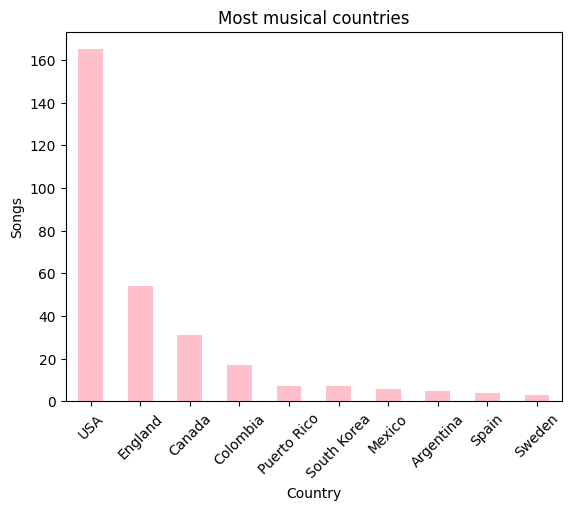

In [70]:
def artists_in_country():
    
    filtered_df = merged_df[~merged_df['artist_country'].str.contains('years old', na=False)]
    # Filters out rows with values that contain "years old" in the 'artist_country' column
    
    
    filtered_df["artist_country"].value_counts().head(10).plot(kind="bar", color="pink", title="Most musical countries")
    plt.xticks(rotation=45)
    # Creates a bar plot for the filtered dataframe
    
    plt.ylabel("Songs")
    # The title of Y-axis is changed to "Songs".
    
    plt.xlabel("Country")
    # The title of X-axis is changed to "Country".
    
   
    plt.savefig("Most_musical_countries.png")
    os.system("open Most_musical_countries.png")
    # Saves the plot and opens it.

artists_in_country()

In [74]:
plt.show()

In [73]:
plt.savefig('Most musical countries.png')
# Saves the plot in a "png" format.

<Figure size 640x480 with 0 Axes>